In [1]:
# Import necessary modules
#!pip install tensorflow

In [2]:
import tensorflow as tf
print(tf.__version__)

2.6.0


In [3]:
# Create an ImageDataGenerator for data augmentation and normalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale = 1./255, # Rescale pixel values between 0 and 1
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [4]:
train_dir = 'G:/millets/train'
test_dir = 'G:/millets/test'

In [5]:
# Create training and testing ImageDataGenerators
training_set = train_datagen.flow_from_directory(train_dir,
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(test_dir,
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical')



Found 3730 images belonging to 4 classes.
Found 935 images belonging to 4 classes.


In [19]:
class_indices = training_set.class_indices
print(class_indices)


{'bajra': 0, 'jowar': 1, 'kodra': 2, 'raagi': 3}


In [6]:
# Define the CNN model architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4, activation='softmax')
])

In [7]:
# Compile the model
#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 11228862649960333518
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 4169138176
locality {
  bus_id: 1
  links {
  }
}
incarnation: 13955760887249300539
physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1660, pci bus id: 0000:26:00.0, compute capability: 7.5"
]


In [10]:
# Train the model on the training data
with tf.device('/device:GPU:0'):
    history = model.fit(training_set, epochs=200, validation_data=test_set)

Epoch 1/200
117/117 [==============================] - 10s 58ms/step - loss: 0.7552 - accuracy: 0.6609 - val_loss: 0.4638 - val_accuracy: 0.8449
Epoch 2/200
117/117 [==============================] - 7s 58ms/step - loss: 0.5014 - accuracy: 0.7946 - val_loss: 0.3199 - val_accuracy: 0.8620
Epoch 3/200
117/117 [==============================] - 6s 53ms/step - loss: 0.3490 - accuracy: 0.8729 - val_loss: 0.2134 - val_accuracy: 0.9337
Epoch 4/200
117/117 [==============================] - 6s 54ms/step - loss: 0.2597 - accuracy: 0.9131 - val_loss: 0.1397 - val_accuracy: 0.9594
Epoch 5/200
117/117 [==============================] - 6s 54ms/step - loss: 0.2274 - accuracy: 0.9340 - val_loss: 0.1154 - val_accuracy: 0.9701
Epoch 6/200
117/117 [==============================] - 6s 54ms/step - loss: 0.1926 - accuracy: 0.9416 - val_loss: 0.0691 - val_accuracy: 0.9775
Epoch 7/200
117/117 [==============================] - 6s 55ms/step - loss: 0.1616 - accuracy: 0.9485 - val_loss: 0.2334 - val_accuracy

117/117 [==============================] - 6s 53ms/step - loss: 0.0428 - accuracy: 0.9866 - val_loss: 0.0875 - val_accuracy: 0.9668
Epoch 58/200
117/117 [==============================] - 6s 54ms/step - loss: 0.0281 - accuracy: 0.9925 - val_loss: 0.0821 - val_accuracy: 0.9786
Epoch 59/200
117/117 [==============================] - 6s 53ms/step - loss: 0.0401 - accuracy: 0.9866 - val_loss: 0.0414 - val_accuracy: 0.9882
Epoch 60/200
117/117 [==============================] - 6s 54ms/step - loss: 0.0546 - accuracy: 0.9834 - val_loss: 0.0805 - val_accuracy: 0.9722
Epoch 61/200
117/117 [==============================] - 6s 53ms/step - loss: 0.0554 - accuracy: 0.9807 - val_loss: 0.0454 - val_accuracy: 0.9882
Epoch 62/200
117/117 [==============================] - 6s 54ms/step - loss: 0.0413 - accuracy: 0.9858 - val_loss: 0.0464 - val_accuracy: 0.9914
Epoch 63/200
117/117 [==============================] - 6s 53ms/step - loss: 0.0239 - accuracy: 0.9925 - val_loss: 0.0556 - val_accuracy: 0.982

117/117 [==============================] - 6s 53ms/step - loss: 0.0153 - accuracy: 0.9952 - val_loss: 0.0352 - val_accuracy: 0.9925
Epoch 114/200
117/117 [==============================] - 6s 55ms/step - loss: 0.0172 - accuracy: 0.9936 - val_loss: 0.0559 - val_accuracy: 0.9893
Epoch 115/200
117/117 [==============================] - 6s 53ms/step - loss: 0.0170 - accuracy: 0.9949 - val_loss: 0.0404 - val_accuracy: 0.9914
Epoch 116/200
117/117 [==============================] - 6s 55ms/step - loss: 0.0226 - accuracy: 0.9936 - val_loss: 0.0374 - val_accuracy: 0.9904
Epoch 117/200
117/117 [==============================] - 6s 54ms/step - loss: 0.0089 - accuracy: 0.9965 - val_loss: 0.0458 - val_accuracy: 0.9904
Epoch 118/200
117/117 [==============================] - 6s 54ms/step - loss: 0.0294 - accuracy: 0.9917 - val_loss: 0.0833 - val_accuracy: 0.9872
Epoch 119/200
117/117 [==============================] - 6s 53ms/step - loss: 0.0168 - accuracy: 0.9933 - val_loss: 0.0461 - val_accuracy:

117/117 [==============================] - 6s 53ms/step - loss: 0.0045 - accuracy: 0.9979 - val_loss: 0.0861 - val_accuracy: 0.9872
Epoch 170/200
117/117 [==============================] - 6s 55ms/step - loss: 0.0179 - accuracy: 0.9936 - val_loss: 0.3073 - val_accuracy: 0.9733
Epoch 171/200
117/117 [==============================] - 6s 53ms/step - loss: 0.0278 - accuracy: 0.9938 - val_loss: 0.0412 - val_accuracy: 0.9904
Epoch 172/200
117/117 [==============================] - 6s 54ms/step - loss: 0.0128 - accuracy: 0.9954 - val_loss: 0.0532 - val_accuracy: 0.9893
Epoch 173/200
117/117 [==============================] - 6s 54ms/step - loss: 0.0074 - accuracy: 0.9987 - val_loss: 0.0588 - val_accuracy: 0.9936
Epoch 174/200
117/117 [==============================] - 6s 54ms/step - loss: 0.0096 - accuracy: 0.9957 - val_loss: 0.0542 - val_accuracy: 0.9914
Epoch 175/200
117/117 [==============================] - 6s 53ms/step - loss: 0.0358 - accuracy: 0.9914 - val_loss: 0.0446 - val_accuracy:

In [11]:
# Evaluate the model on the testing data
test_loss, test_accuracy = model.evaluate(test_set)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

30/30 [==============================] - 1s 16ms/step - loss: 0.0523 - accuracy: 0.9893
Test loss: 0.052319157868623734
Test accuracy: 0.9893048405647278


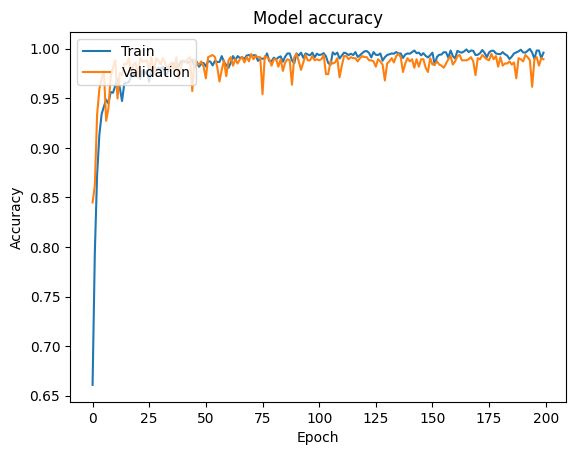

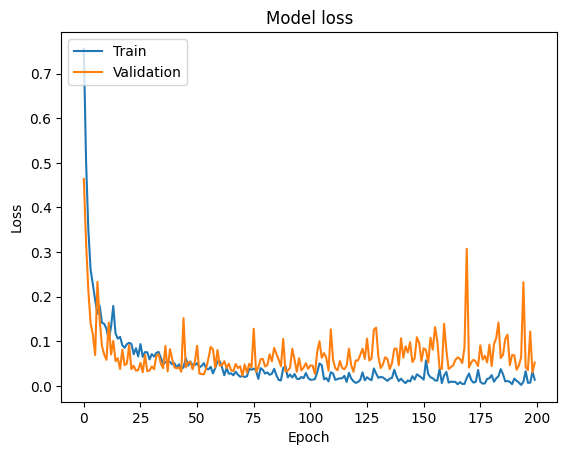

In [12]:
# Plot training & validation accuracy values
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [13]:
test_loss, test_acc = model.evaluate(test_set)
print('Test accuracy:', test_acc)

30/30 [==============================] - 1s 16ms/step - loss: 0.0523 - accuracy: 0.9893
Test accuracy: 0.9893048405647278


In [14]:
# Evaluate the model
loss, accuracy = model.evaluate(test_set)
print(f"Test Loss: {loss:.2f}")
print(f"Test Accuracy: {accuracy:.2f}")


30/30 [==============================] - 1s 16ms/step - loss: 0.0523 - accuracy: 0.9893
Test Loss: 0.05
Test Accuracy: 0.99


In [32]:
model.save('millets_cnn.h5')

In [22]:

# Compute evaluation metrics
#y_true = test_generator.classes
#y_true = training_set.classes
from sklearn.metrics import confusion_matrix, classification_report
#y_pred = model.predict(training_set)
#import numpy as np
# Convert predicted probabilities to class labels
#y_pred = np.argmax(y_pred, axis=1)

#cm = confusion_matrix(y_true, y_pred)
#print(f"Confusion Matrix:\n{cm}")



In [23]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Get the true labels for the testing set
y_true = []
num_batches = len(test_set)
for i in range(num_batches):
    _, labels = test_set[i]
    y_true.extend(labels)

y_true = np.argmax(y_true, axis=1)

# Make predictions on the testing set
predictions = model.predict(test_set)
y_pred = np.argmax(predictions, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)
print(f"Confusion Matrix:\n{cm}")

Confusion Matrix:
[[265   1   0   0]
 [  1 106   0   0]
 [  2   2 227   4]
 [  0   0   0 327]]


In [24]:
cr = classification_report(y_true, y_pred)
print(f"Classification Report:\n{cr}")

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       266
           1       0.97      0.99      0.98       107
           2       1.00      0.97      0.98       235
           3       0.99      1.00      0.99       327

    accuracy                           0.99       935
   macro avg       0.99      0.99      0.99       935
weighted avg       0.99      0.99      0.99       935



In [26]:

# Compute Discriminant Power (DP)
#dp = abs(np.diff(np.sum(y_pred.reshape(-1, 2), axis=1)))
#print(f"Discriminant Power (DP): {dp:.2f}")



In [ ]:
# Compile the model
#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model and save the training history in a variable
#history = model.fit(training_set, epochs=10, validation_data=test_set)

# Plot training & validation accuracy values
#plt.plot(history.history['accuracy'])
##plt.plot(history.history['val_accuracy'])
#plt.title('Model accuracy')
#plt.ylabel('Accuracy')
#plt.xlabel('Epoch')
#plt.legend(['Train', 'Validation'], loc='upper left')
#plt.show()

# Plot training & validation loss values
#plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
#plt.title('Model loss')
#plt.ylabel('Loss')
#plt.xlabel('Epoch')
#plt.legend(['Train', 'Validation'], loc='upper left')
#plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
#plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
#plt.title('Model accuracy')
#plt.ylabel('Accuracy')
#plt.xlabel('Epoch')
#plt.legend(['Train', 'Validation'], loc='upper left')
#plt.show()

# Plot training & validation loss values
#plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
#plt.title('Model loss')
#plt.ylabel('Loss')
#lt.xlabel('Epoch')
#plt.legend(['Train', 'Validation'], loc='upper left')
#plt.show()


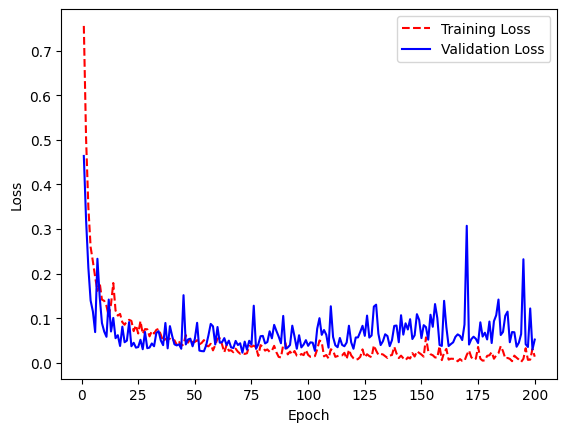

In [27]:
import matplotlib.pyplot as plt

# Get training and validation loss histories
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(train_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, train_loss, 'r--')
plt.plot(epoch_count, val_loss, 'b-')
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


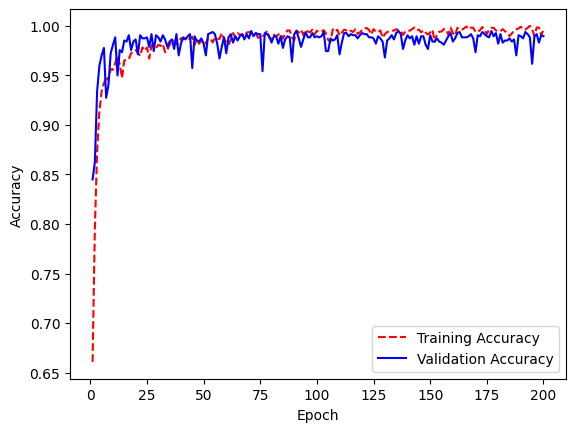

In [28]:
import matplotlib.pyplot as plt

# Get training and validation accuracy histories
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Visualize accuracy history
plt.plot(epoch_count, train_acc, 'r--')
plt.plot(epoch_count, val_acc, 'b-')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()


In [31]:
import matplotlib.pyplot as plt